In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
import statsmodels.api as sm

In [55]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('dm.csv',na_values=["", " ", "NA", "N/A"])

In [3]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
data['Target'] = data['AmountSpent'].map(lambda x: 1 if x>data['AmountSpent'].mean() else 0)

In [6]:
data.drop('AmountSpent',axis=1,inplace=True)

In [7]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [10]:
data.shape

(1000, 11)

In [8]:
data['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [9]:
data['History'].isnull().sum()

303

In [11]:
data['History'] = data['History'].fillna('NewCust')

In [12]:
data['History'].value_counts()

NewCust    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [13]:
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'Cust_Id', 'Target'],
      dtype='object')

In [14]:
data = pd.get_dummies(data, columns=['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History'],prefix='class')

In [15]:
data.head()

,Salary,Children,Catalogs,Cust_Id,Target,class_Middle,class_Old,class_Young,class_Female,class_Male,class_Own,class_Rent,class_Married,class_Single,class_Close,class_Far,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,247,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,127,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,479,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,475,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,151,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [16]:
data.columns

Index(['Salary', 'Children', 'Catalogs', 'Cust_Id', 'Target', 'class_Middle',
       'class_Old', 'class_Young', 'class_Female', 'class_Male', 'class_Own',
       'class_Rent', 'class_Married', 'class_Single', 'class_Close',
       'class_Far', 'class_High', 'class_Low', 'class_Medium',
       'class_NewCust'],
      dtype='object')

In [17]:
data.drop(['Cust_Id', 'class_Male', 'class_Rent', 'class_Single', 'class_Far'], axis=1, inplace=True)

In [18]:
data.head()

,Salary,Children,Catalogs,Target,class_Middle,class_Old,class_Young,class_Female,class_Own,class_Married,class_Close,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,0,0,1,0,1,1,0,0,1,0,0,0
1,63600,0,6,1,1,0,0,0,0,0,1,1,0,0,0
2,13500,0,18,0,0,0,1,1,0,0,1,0,1,0,0
3,85600,1,18,1,1,0,0,0,1,1,1,1,0,0,0
4,68400,0,12,1,1,0,0,1,1,0,1,1,0,0,0


In [19]:
data.shape

(1000, 15)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('Target',axis=1),data['Target'],\
                                               test_size=0.2, random_state=42)

In [23]:
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [24]:
model1 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                  800
Model:                            GLM   Df Residuals:                      787
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.34
Date:                Wed, 16 Feb 2022   Deviance:                       386.67
Time:                        11:59:06   Pearson chi2:                     479.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.4089   2108.820     -0.004      0.997   -4140.620    4125.802
Salary         6.857e-05   1.07e-05      6.401      0.000    4.76e-05    8.96e-05
Children         -0.7417      0.177     -4.193      0.000      -1.088      -0.395
Catalogs          0.2083      0.024      8.738      0.000       0.162       0.255
class_Middle     -2.1876    702.940     -0.003      0.998   -1379.925    1375.549
class_Old        -2.1784    702.940     -0.003      0.998   -1379.915    1375.559
class_Young      -3.0429    702.940     -0.004      0.997   -1380.780    1374.694
class_Female     -0.3089      0.271     -1.141      0.254      -0.840       0.222
class_Own         0.2163      0.300      0.720      0.471      -0.372       0.805
class_Married     0.1562      0.349      0.447      0.655      -0.528       0.840
class_Close      -1.7830      0.346     -5.148      0.000      -2.462      -1.104
class_High        4.5367   2811.760      0.002      0.999   -5506.411    5515.484
class_Low       -19.7524   1.05e+04     -0.002      0.999   -2.07e+04    2.06e+04
class_Medium      2.7703   2811.760      0.001      0.999   -5508.177    5513.718
class_NewCust     5.0365   2811.760      0.002      0.999   -5505.911    5515.984
=================================================================================
"""

In [26]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                  GLM                AIC:              412.6700  
Link Function:          logit              BIC:              -4874.1194
Dependent Variable:     Target             Log-Likelihood:   -193.34   
Date:                   2022-02-16 11:59   LL-Null:          -542.20   
No. Observations:       800                Deviance:         386.67    
Df Model:               12                 Pearson chi2:     479.      
Df Residuals:           787                Scale:            1.0000    
Method:                 IRLS                                           
-----------------------------------------------------------------------
               Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
const          -7.4089  2108.8197 -0.0035 0.9972  -4140.6196  4125.8017
Salary          0.0001     0.0000  6.4011 0.0000      0.0000     0.0001
Children       -0.7417     0.1769 -4.1930 0.0000     -1.0885    -0.3950
Catalogs        0.2083     0.0238  8.7380 0.0000      0.1616     0.2550
class_Middle   -2.1876   702.9399 -0.0031 0.9975  -1379.9246  1375.5494
class_Old      -2.1784   702.9399 -0.0031 0.9975  -1379.9154  1375.5585
class_Young    -3.0429   702.9399 -0.0043 0.9965  -1380.7798  1374.6941
class_Female   -0.3089     0.2708 -1.1406 0.2541     -0.8397     0.2219
class_Own       0.2163     0.3003  0.7202 0.4714     -0.3723     0.8049
class_Married   0.1562     0.3490  0.4474 0.6546     -0.5279     0.8402
class_Close    -1.7830     0.3463 -5.1482 0.0000     -2.4618    -1.1042
class_High      4.5367  2811.7595  0.0016 0.9987  -5506.4107  5515.4841
class_Low     -19.7524 10544.0982 -0.0019 0.9985 -20685.8052 20646.3003
class_Medium    2.7703  2811.7595  0.0010 0.9992  -5508.1771  5513.7177
class_NewCust   5.0365  2811.7595  0.0018 0.9986  -5505.9109  5515.9839
=======================================================================

"""

In [27]:
xtrain.drop(['class_Medium'],axis=1,inplace=True)
xtest.drop(['class_Medium'],axis=1,inplace=True)

In [28]:
model2 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [29]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                  GLM                AIC:              412.6700  
Link Function:          logit              BIC:              -4874.1194
Dependent Variable:     Target             Log-Likelihood:   -193.34   
Date:                   2022-02-16 12:01   LL-Null:          -542.20   
No. Observations:       800                Deviance:         386.67    
Df Model:               12                 Pearson chi2:     479.      
Df Residuals:           787                Scale:            1.0000    
Method:                 IRLS                                           
-----------------------------------------------------------------------
               Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
const          -5.3312     0.5666 -9.4084 0.0000     -6.4418    -4.2206
Salary          0.0001     0.0000  6.4011 0.0000      0.0000     0.0001
Children       -0.7417     0.1769 -4.1930 0.0000     -1.0885    -0.3950
Catalogs        0.2083     0.0238  8.7380 0.0000      0.1616     0.2550
class_Middle   -1.4950     0.3133 -4.7712 0.0000     -2.1092    -0.8809
class_Old      -1.4859     0.3113 -4.7730 0.0000     -2.0960    -0.8757
class_Young    -2.3503     0.3268 -7.1924 0.0000     -2.9908    -1.7098
class_Female   -0.3089     0.2708 -1.1406 0.2541     -0.8397     0.2219
class_Own       0.2163     0.3003  0.7202 0.4714     -0.3723     0.8049
class_Married   0.1562     0.3490  0.4474 0.6546     -0.5279     0.8402
class_Close    -1.7830     0.3463 -5.1482 0.0000     -2.4618    -1.1042
class_High      1.7664     0.4073  4.3368 0.0000      0.9681     2.5647
class_Low     -22.5227 13355.8577 -0.0017 0.9987 -26199.5228 26154.4774
class_NewCust   2.2662     0.3398  6.6690 0.0000      1.6002     2.9322
=======================================================================

"""

In [30]:
xtrain.drop(['class_Low'],axis=1,inplace=True)
xtest.drop(['class_Low'],axis=1,inplace=True)

In [31]:
model3 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [32]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            421.9369  
Link Function:      logit            BIC:            -4869.5371
Dependent Variable: Target           Log-Likelihood: -198.97   
Date:               2022-02-16 12:02 LL-Null:        -542.20   
No. Observations:   800              Deviance:       397.94    
Df Model:           11               Pearson chi2:   537.      
Df Residuals:       788              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -5.4100   0.5452 -9.9227 0.0000 -6.4786 -4.3414
Salary           0.0001   0.0000  6.5279 0.0000  0.0000  0.0001
Children        -0.8594   0.1728 -4.9738 0.0000 -1.1980 -0.5207
Catalogs         0.2105   0.0235  8.9641 0.0000  0.1644  0.2565
class_Middle    -1.4396   0.3100 -4.6438 0.0000 -2.0472 -0.8320
class_Old       -1.5260   0.3079 -4.9565 0.0000 -2.1294 -0.9226
class_Young     -2.4445   0.3199 -7.6422 0.0000 -3.0714 -1.8175
class_Female    -0.2970   0.2703 -1.0986 0.2719 -0.8269  0.2329
class_Own        0.2146   0.2992  0.7172 0.4733 -0.3719  0.8010
class_Married    0.2344   0.3496  0.6703 0.5027 -0.4509  0.9197
class_Close     -1.8908   0.3455 -5.4720 0.0000 -2.5680 -1.2135
class_High       1.9076   0.4090  4.6644 0.0000  1.1060  2.7092
class_NewCust    2.4945   0.3321  7.5117 0.0000  1.8436  3.1454
===============================================================

"""

In [33]:
xtrain.drop(['class_Married'],axis=1,inplace=True)
xtest.drop(['class_Married'],axis=1,inplace=True)

In [34]:
model4 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [35]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            420.3846  
Link Function:      logit            BIC:            -4875.7740
Dependent Variable: Target           Log-Likelihood: -199.19   
Date:               2022-02-16 12:03 LL-Null:        -542.20   
No. Observations:   800              Deviance:       398.38    
Df Model:           10               Pearson chi2:   557.      
Df Residuals:       789              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -5.4776   0.5378 -10.1860 0.0000 -6.5316 -4.4236
Salary          0.0001   0.0000   8.2763 0.0000  0.0001  0.0001
Children       -0.8496   0.1718  -4.9464 0.0000 -1.1863 -0.5130
Catalogs        0.2112   0.0234   9.0080 0.0000  0.1652  0.2572
class_Middle   -1.5243   0.2841  -5.3650 0.0000 -2.0811 -0.9674
class_Old      -1.5228   0.3076  -4.9506 0.0000 -2.1257 -0.9199
class_Young    -2.4305   0.3182  -7.6374 0.0000 -3.0542 -1.8068
class_Female   -0.2718   0.2677  -1.0154 0.3099 -0.7964  0.2528
class_Own       0.1955   0.2973   0.6574 0.5109 -0.3873  0.7782
class_Close    -1.8966   0.3453  -5.4931 0.0000 -2.5733 -1.2199
class_High      1.8963   0.4084   4.6433 0.0000  1.0958  2.6967
class_NewCust   2.4962   0.3322   7.5135 0.0000  1.8451  3.1474
===============================================================

"""

In [36]:
xtrain.drop(['class_Own'],axis=1,inplace=True)
xtest.drop(['class_Own'],axis=1,inplace=True)

In [37]:
model5 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [38]:
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            418.8162  
Link Function:      logit            BIC:            -4882.0270
Dependent Variable: Target           Log-Likelihood: -199.41   
Date:               2022-02-16 12:04 LL-Null:        -542.20   
No. Observations:   800              Deviance:       398.82    
Df Model:           9                Pearson chi2:   553.      
Df Residuals:       790              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -5.4665   0.5376 -10.1678 0.0000 -6.5202 -4.4128
Salary          0.0001   0.0000   8.5453 0.0000  0.0001  0.0001
Children       -0.8446   0.1714  -4.9269 0.0000 -1.1805 -0.5086
Catalogs        0.2110   0.0234   9.0175 0.0000  0.1652  0.2569
class_Middle   -1.5183   0.2837  -5.3519 0.0000 -2.0743 -0.9623
class_Old      -1.4697   0.2963  -4.9608 0.0000 -2.0503 -0.8890
class_Young    -2.4785   0.3108  -7.9741 0.0000 -3.0877 -1.8693
class_Female   -0.2637   0.2672  -0.9870 0.3236 -0.7875  0.2600
class_Close    -1.8742   0.3435  -5.4570 0.0000 -2.5474 -1.2011
class_High      1.9055   0.4073   4.6783 0.0000  1.1072  2.7038
class_NewCust   2.5085   0.3320   7.5558 0.0000  1.8578  3.1593
===============================================================

"""

In [39]:
xtrain.drop(['class_Female'],axis=1,inplace=True)
xtest.drop(['class_Female'],axis=1,inplace=True)

In [40]:
model6 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [41]:
model6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            417.7897  
Link Function:      logit            BIC:            -4887.7382
Dependent Variable: Target           Log-Likelihood: -199.89   
Date:               2022-02-16 12:05 LL-Null:        -542.20   
No. Observations:   800              Deviance:       399.79    
Df Model:           8                Pearson chi2:   581.      
Df Residuals:       791              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -5.5792   0.5270 -10.5873 0.0000 -6.6120 -4.5463
Salary          0.0001   0.0000   8.7903 0.0000  0.0001  0.0001
Children       -0.8673   0.1702  -5.0946 0.0000 -1.2009 -0.5336
Catalogs        0.2103   0.0233   9.0342 0.0000  0.1646  0.2559
class_Middle   -1.5405   0.2823  -5.4560 0.0000 -2.0939 -0.9871
class_Old      -1.5364   0.2887  -5.3216 0.0000 -2.1022 -0.9705
class_Young    -2.5023   0.3118  -8.0253 0.0000 -3.1134 -1.8912
class_Close    -1.8871   0.3441  -5.4850 0.0000 -2.5615 -1.2128
class_High      1.8771   0.4057   4.6272 0.0000  1.0820  2.6722
class_NewCust   2.4871   0.3302   7.5313 0.0000  1.8399  3.1344
===============================================================

"""

In [44]:
predictions = model6.predict(xtest)

In [45]:
predictions

521    0.002653
737    0.041345
740    0.019799
660    0.000226
411    0.253016
         ...   
408    0.015969
332    0.952753
208    0.238566
613    0.289760
78     0.000425
Length: 200, dtype: float64

In [46]:
threshold=0.5
predicted_classes = np.where(predictions>threshold,1,0)

In [47]:
ytest

521    0
737    0
740    0
660    0
411    0
      ..
408    0
332    1
208    0
613    0
78     0
Name: Target, Length: 200, dtype: int64

In [48]:
accuracy_score(ytest,predicted_classes)

0.89

In [49]:
confmat = confusion_matrix(ytest, predicted_classes)

In [50]:
confmat

array([[119,  12],
       [ 10,  59]], dtype=int64)

In [51]:
confmat = pd.DataFrame(confmat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

In [52]:
confmat

,Predicted 0,Predicted 1
Actual 0,119,12
Actual 1,10,59


In [54]:
print(classification_report(ytest, predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       131
           1       0.83      0.86      0.84        69

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [56]:
roc_score = roc_auc_score(ytest,predictions)

In [57]:
roc_score

0.9587343732713796

In [58]:
fpr, tpr, threshold = roc_curve(ytest,predictions)

In [62]:
threshold

array([1.99991424e+00, 9.99914243e-01, 9.44236257e-01, 9.41703826e-01,
       8.94482933e-01, 8.69065757e-01, 8.45099029e-01, 8.36840135e-01,
       7.96489826e-01, 7.96000602e-01, 7.80284298e-01, 7.10934301e-01,
       6.85995097e-01, 6.81387539e-01, 6.60705657e-01, 6.06387742e-01,
       5.98318377e-01, 5.79919915e-01, 5.26267796e-01, 5.05470757e-01,
       4.77372292e-01, 4.60893690e-01, 4.43023265e-01, 3.77449599e-01,
       3.66703246e-01, 3.29050701e-01, 3.10105675e-01, 2.74759386e-01,
       2.61493160e-01, 2.09374641e-01, 2.09177618e-01, 1.62016411e-01,
       1.61027208e-01, 8.29807984e-02, 8.12487592e-02, 4.21481984e-02,
       4.15875564e-02, 1.11178269e-04])

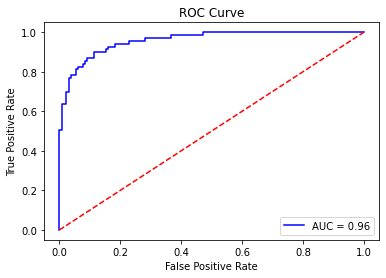

In [67]:
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_score)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = threshold[optimal_idx]

In [70]:
optimal_threshold

0.44302326482927595

In [71]:
predicted_classes = np.where(predictions>optimal_threshold,1,0)

In [72]:
accuracy_score(ytest,predicted_classes)

0.885

In [73]:
confmat = confusion_matrix(ytest, predicted_classes)
confmat = pd.DataFrame(confmat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confmat

,Predicted 0,Predicted 1
Actual 0,116,15
Actual 1,8,61


In [74]:
print(classification_report(ytest, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       131
           1       0.80      0.88      0.84        69

    accuracy                           0.89       200
   macro avg       0.87      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [75]:
mreview = pd.read_table('movie_reviews.tsv',sep='\t')

In [76]:
mreview.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [79]:
mreview['review'][20000]

'I just watched it. A couple of laughs, but nothing to write home about. Jason Lee looked like he was having fun. The (long) DVD gag reel consists almost solely of him having fits of uncontrollable laughter. Selma Blair seemed to be punching a time clock, but then again, her character was supposed to be a stick in the mud, so \\well done\\" I guess? Jim Brolin was surprisingly funny. (Being married to Babs can\'t be a picnic.) The soundtrack was hip, and eclectic. Larry Miller, who played Julia Stiles father (hilariously), in 10 Things I Hate About You is funny here as well. He\'s great, but the best aspect of this movie was the casting of Julia Stiles. I could spend two hours watching her fold laundry, and I feel like I just did."'

In [78]:
mreview.shape

(25000, 3)

In [80]:
mreview.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [81]:
mreview['sentiment'].describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

In [ ]:
#Convert [text]-->[predictor_matrix]

#Term-Document Matrix